# Importação Pacotes

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from os.path import expanduser as ospath
%matplotlib inline
import statsmodels.api as sm
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

# Leitura dos Dados

In [7]:
def logReturn(series):
    return np.log(series/series.shift(1))

In [8]:
def readData(file):
    df = pd.read_excel(ospath(os.getcwd() + '/data/Curva Forward/' + file), index_col=0, skiprows=[0,1,2], header = None)
    df.columns = ['date', 'price']
    df["date"] = pd.to_datetime(df["date"])
    df['logReturn'] = logReturn(df.price)
    return df

In [9]:
data = {'M1': '2019-03-01_15-12-06_Evolucao_historica_da__Media__na_serie_M__1_na_fonte_Convencional_SE_.xlsx' ,
        'M2': '2019-03-01_15-15-00_Evolucao_historica_da__Media__na_serie_M__2_na_fonte_Convencional_SE_.xlsx',
        'M3': '2019-03-01_15-15-12_Evolucao_historica_da__Media__na_serie_M__3_na_fonte_Convencional_SE_.xlsx' ,
        'A0': '2019-03-01_15-16-21_Evolucao_historica_da__Media__na_serie_A__0_na_fonte_Convencional_SE_.xlsx',
        'A1': '2019-03-01_15-16-32_Evolucao_historica_da__Media__na_serie_A__1_na_fonte_Convencional_SE_.xlsx', 
        'A2': '2019-03-01_15-16-45_Evolucao_historica_da__Media__na_serie_A__2_na_fonte_Convencional_SE_.xlsx',
        'A3': '2019-03-01_15-16-58_Evolucao_historica_da__Media__na_serie_A__3_na_fonte_Convencional_SE_.xlsx',
        'A4': '2019-03-01_15-17-12_Evolucao_historica_da__Media__na_serie_A__4_na_fonte_Convencional_SE_.xlsx'}

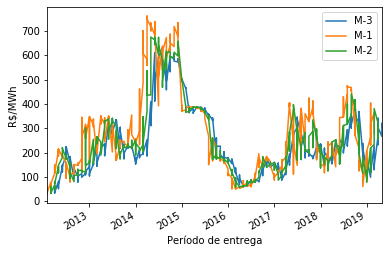

In [10]:
from dateutil.relativedelta import *
M1 = readData(data['M1'])
M1.price = M1.price.interpolate()
M1['delivery'] = M1.date.apply(lambda x: x + relativedelta(months=+1)) 
M1.set_index(M1.date, inplace=True, drop=True)
M1 = M1[['price', 'delivery']]

M2 = readData(data['M2'])
M2.price = M2.price.interpolate()
M2['delivery'] = M2.date.apply(lambda x: x + relativedelta(months=+2)) 
M2.set_index(M2.date, inplace=True, drop=True)
M2 = M2[['price', 'delivery']]

M3 = readData(data['M3'])
M3.price = M3.price.interpolate()
M3['delivery'] = M3.date.apply(lambda x: x + relativedelta(months=+3)) 
M3.set_index(M3.date, inplace=True, drop=True)
M3 = M3[['price', 'delivery']]

monthly_delivery_price = pd.merge(M3,pd.merge(M1, M2, left_on='delivery',right_on='delivery',how='outer',suffixes=('M1','M2'))
, left_on='delivery',right_on='delivery',how='outer')


monthly_delivery_price.set_index(monthly_delivery_price.delivery, inplace=True, drop=True)
monthly_delivery_price = monthly_delivery_price.drop(['delivery'], axis=1)
monthly_delivery_price = monthly_delivery_price.rename(columns={"price": "M-3", "priceM1": "M-1", 'priceM2': 'M-2'})
fig = monthly_delivery_price.plot()
fig.set_xlabel("Período de entrega")
fig.set_ylabel("R$/MWh")
fig.get_figure().savefig(ospath(os.getcwd() + '/figs/monthly_delivery_price.png'))


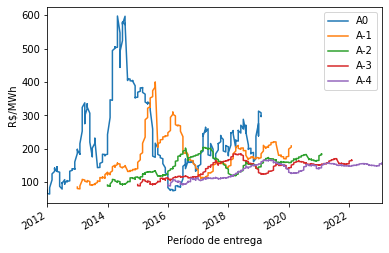

In [11]:
from dateutil.relativedelta import *
A0 = readData(data['A0'])
A0.price = A0.price.interpolate()
A0['delivery'] = A0.date 
A0.set_index(A0.date, inplace=True, drop=True)
A0 = A0[['price', 'delivery']]

A1 = readData(data['A1'])
A1.price = A1.price.interpolate()
A1['delivery'] = A1.date.apply(lambda x: x + relativedelta(years=+1)) 
A1.set_index(A1.date, inplace=True, drop=True)
A1 = A1[['price', 'delivery']]

A2 = readData(data['A2'])
A2.price = A2.price.interpolate()
A2['delivery'] = A2.date.apply(lambda x: x + relativedelta(years=+2)) 
A2.set_index(A2.date, inplace=True, drop=True)
A2 = A2[['price', 'delivery']]

A3 = readData(data['A3'])
A3.price = A3.price.interpolate()
A3['delivery'] = A3.date.apply(lambda x: x + relativedelta(years=+3)) 
A3.set_index(A3.date, inplace=True, drop=True)
A3 = A3[['price', 'delivery']]

A4 = readData(data['A4'])
A4.price = A4.price.interpolate()
A4['delivery'] = A4.date.apply(lambda x: x + relativedelta(years=+4)) 
A4.set_index(A4.date, inplace=True, drop=True)
A4 = A4[['price', 'delivery']]

yearly_delivery_price =  pd.merge(A0, pd.merge(pd.merge(A1, A2, left_on='delivery',right_on='delivery',how='outer',suffixes=('A1','A2')),pd.merge(A3, A4, left_on='delivery',right_on='delivery',how='outer',suffixes=('A3','A4'))
, left_on='delivery',right_on='delivery',how='outer'), left_on='delivery',right_on='delivery',how='outer',suffixes=('A0',''))


yearly_delivery_price.set_index(yearly_delivery_price.delivery, inplace=True, drop=True)
yearly_delivery_price = yearly_delivery_price.drop(['delivery'], axis=1)
yearly_delivery_price = yearly_delivery_price.rename(columns={"price": "A0", "priceA1": "A-1", 'priceA2': 'A-2', 'priceA3': 'A-3','priceA4': 'A-4'})
fig = yearly_delivery_price.plot()
fig.set_xlabel("Período de entrega")
fig.set_ylabel("R$/MWh")
fig.get_figure().savefig(ospath(os.getcwd() + '/figs/yearly_delivery_price.png'))

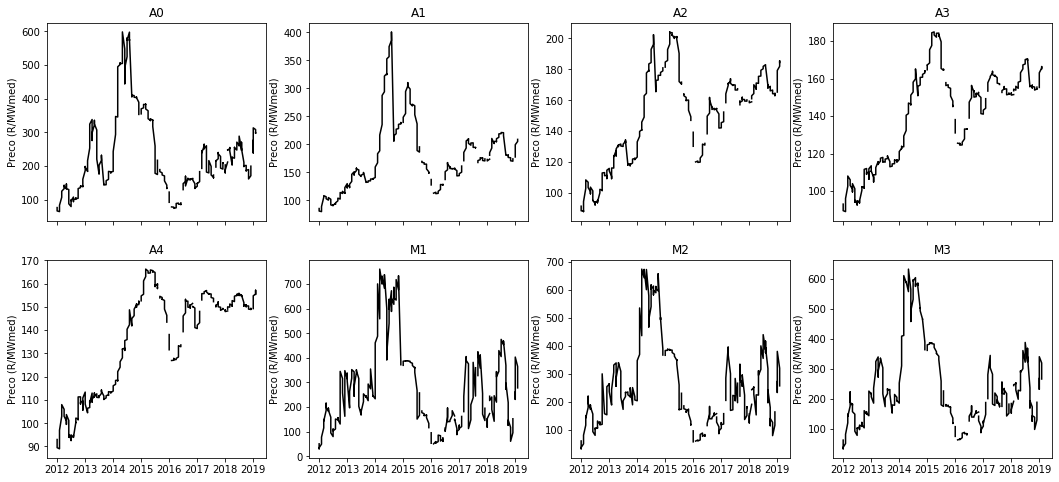

In [12]:
k = 0
products = sorted(data.keys())
fig, ax = plt.subplots(2, 4, sharex='col', figsize = (18,8))
for i in range(2):
    for j in range(4):
        df = readData(data[products[k]])
        ax[i, j].plot(df.date,df.price, 'k')
        ax[i, j].set_title(products[k])
        ax[i,j].set(ylabel='Preco (R/MWmed)')
        k = k + 1
        
fig.savefig(ospath(os.getcwd() + '/figs/priceSeries.png'))


# Sasonalidade

In [22]:
from statsmodels.tsa.seasonal import seasonal_decompose
def hamilton(df, label):
    result = seasonal_decompose(df.price, model='additive', freq=48)
    df['Correção'] = result.seasonal
    df['Preço Corrigido'] = df.price - df['Correção']
    df['Preço'] = df.price
    plt = df[['Preço','Correção', 'Preço Corrigido']].plot()


    plt.set_xlabel("data")
    plt.set_ylabel("R$/MWh")
    plt.set_title("Análise de Sasonalidade " + label)
    plt.get_figure().savefig(ospath(os.getcwd() + '/figs/season'+ label + '.png'))
    
    mod_hamilton = sm.tsa.MarkovAutoregression(df['Preço Corrigido'], k_regimes=2, order=1, switching_ar=False)
    res_hamilton = mod_hamilton.fit()
    with open(os.getcwd() + '/model_results/hamilton_'+ label + '.tex', "w") as text_file:
        text_file.write(res_hamilton.summary().as_latex())
    return res_hamilton

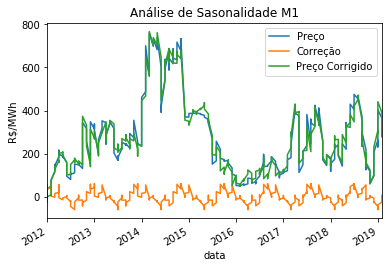

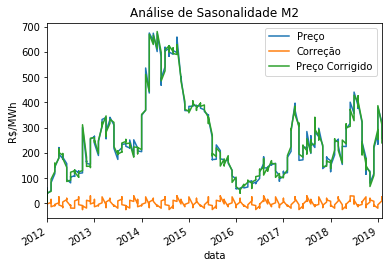

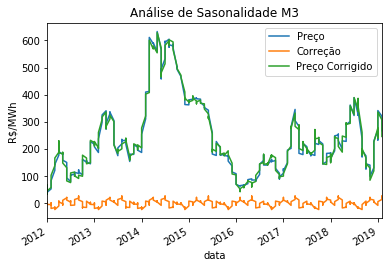

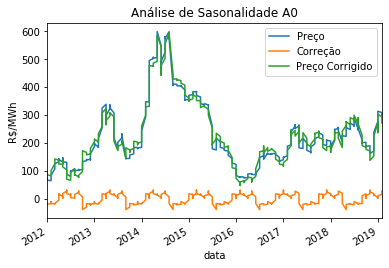

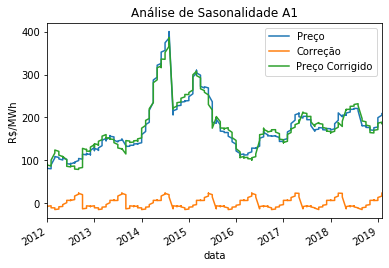

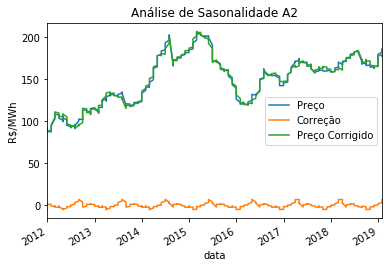

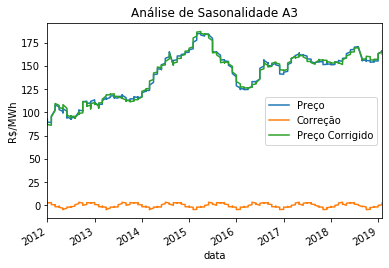

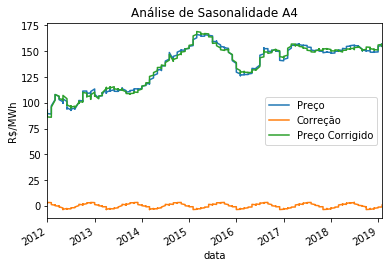

In [23]:
M1_ham = hamilton(M1, 'M1')
M2_ham = hamilton(M2, 'M2')
M3_ham = hamilton(M3, 'M3')
A0_ham = hamilton(A0, 'A0')
A1_ham = hamilton(A1, 'A1')
A2_ham = hamilton(A2, 'A2')
A3_ham = hamilton(A3, 'A3')
A4_ham = hamilton(A4, 'A4')


# Análise Retornos

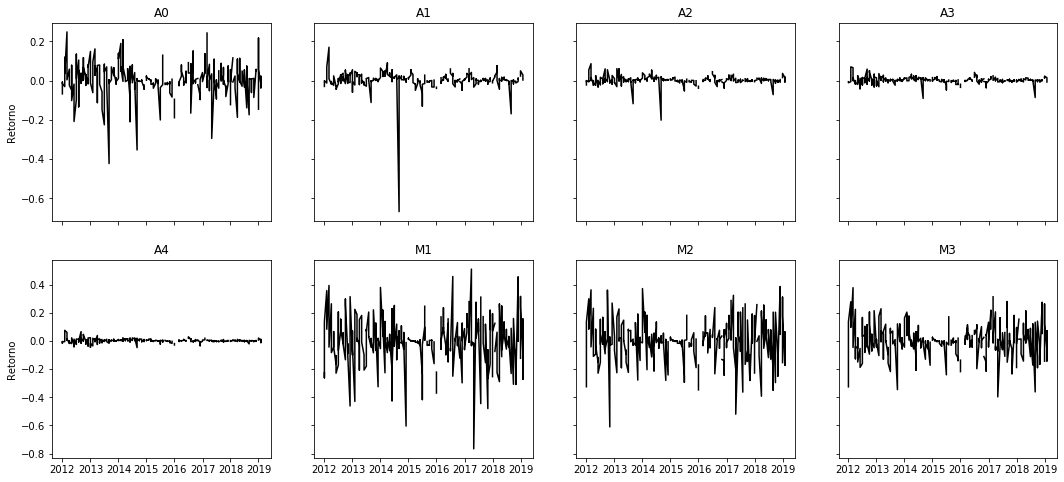

In [24]:
k = 0

products = sorted(data.keys())
fig, ax = plt.subplots(2, 4, sharex='col', sharey='row', figsize = (18,8))
for i in range(2):
    for j in range(4):
        df = readData(data[products[k]])
        ax[i, j].plot(df.date,df.logReturn, 'k')
        ax[i, j].set_title(products[k])
        ax[i,0].set(ylabel='Retorno')
        k = k + 1
fig.savefig(ospath(os.getcwd() + '/figs/returnSeries.png'))

## Estatísticas Descritivas

In [25]:
ret = {'date': df.date}
for key in data.keys():
    df = readData(data[key])
    ret[key] = logReturn(df.price.interpolate())

Returns = pd.DataFrame(ret)
Returns.set_index(Returns.date, inplace=True, drop=True)

Returns = Returns.dropna()
Returns.head()

,date,M1,M2,M3,A0,A1,A2,A3,A4
date,,,,,,,,,
2012-01-01,2012-01-01,-0.225476,-0.325524,-0.326160,-0.067593,-0.029676,-0.022100,-0.005391,-0.005391
2012-01-01,2012-01-01,-0.262091,-0.245578,-0.256332,-0.050190,-0.018238,-0.005602,-0.010870,-0.010870
2012-01-01,2012-01-01,-0.025508,-0.047962,-0.026790,-0.007380,-0.006154,0.000000,-0.010989,-0.016529
2012-01-01,2012-01-01,0.134318,0.133760,0.135659,-0.014926,0.000000,-0.005634,-0.011111,-0.005571
2012-02-01,2012-02-01,0.356501,0.298700,0.277670,-0.030537,-0.012423,0.000000,-0.005602,-0.005602


In [26]:
Returns.describe()

,M1,M2,M3,A0,A1,A2,A3,A4
count,373.000000,373.000000,373.000000,373.000000,373.000000,373.000000,373.000000,373.000000
mean,0.004575,0.003868,0.003843,0.003647,0.002394,0.001879,0.001541,0.001377
std,0.159030,0.133822,0.104732,0.074848,0.044889,0.020494,0.015049,0.012779
min,-0.765861,-0.610410,-0.397172,-0.422569,-0.667080,-0.201472,-0.090943,-0.047779
25%,-0.058296,-0.044262,-0.039495,-0.017764,-0.006440,-0.003418,-0.003554,-0.003594
50%,0.001730,0.001896,0.000278,0.002376,0.002581,0.001862,0.001916,0.001013
75%,0.078704,0.062419,0.048514,0.039320,0.016514,0.009377,0.007277,0.006596
max,0.509190,0.385698,0.377432,0.247982,0.170075,0.086129,0.070110,0.074901


## Correlações

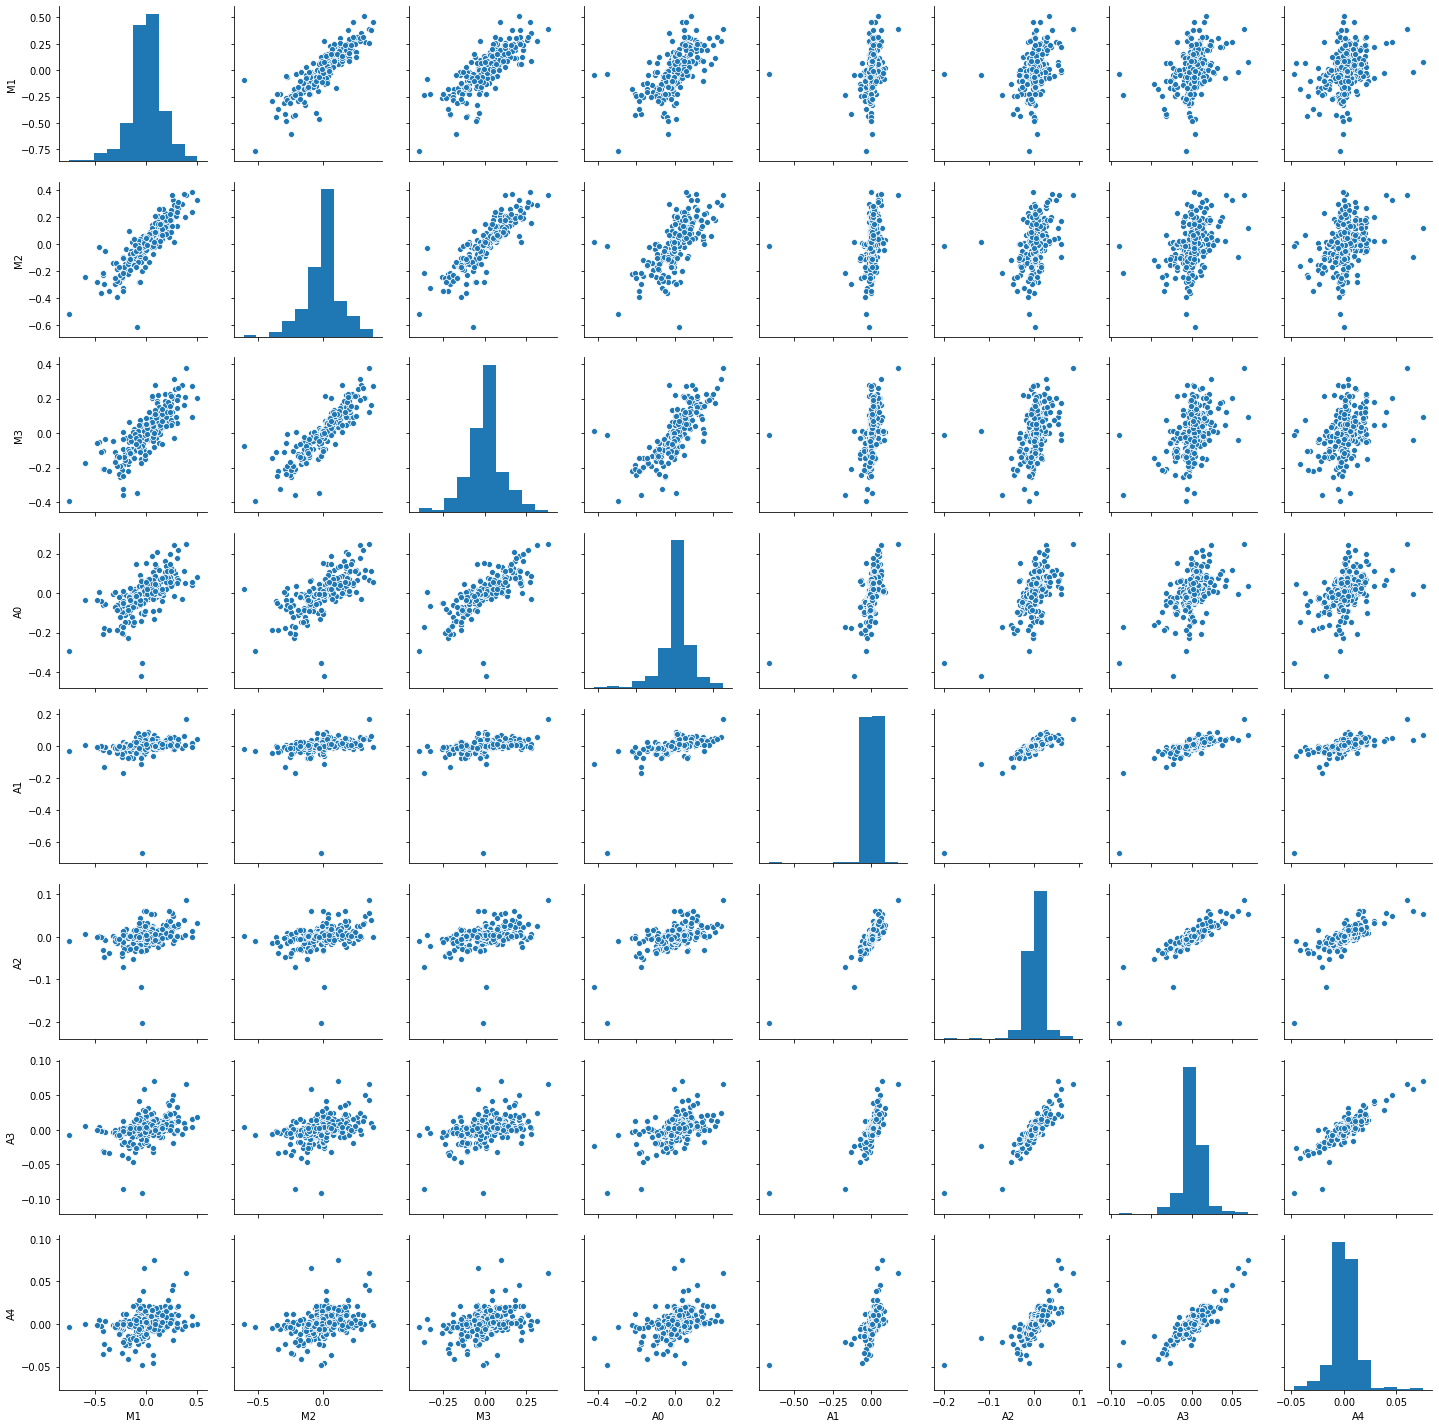

In [27]:
fig = sns.pairplot(Returns)
fig.savefig(ospath(os.getcwd() + '/figs/correlationPlot.png'))



In [28]:
Returns.corr()


,M1,M2,M3,A0,A1,A2,A3,A4
M1,1.000000,0.863085,0.796667,0.634011,0.278095,0.334943,0.352165,0.299033
M2,0.863085,1.000000,0.864676,0.663985,0.300962,0.357733,0.379113,0.331382
M3,0.796667,0.864676,1.000000,0.749715,0.337892,0.389670,0.435046,0.353928
A0,0.634011,0.663985,0.749715,1.000000,0.571328,0.595437,0.518877,0.435211
A1,0.278095,0.300962,0.337892,0.571328,1.000000,0.842539,0.709232,0.551783
A2,0.334943,0.357733,0.389670,0.595437,0.842539,1.000000,0.856041,0.733624
A3,0.352165,0.379113,0.435046,0.518877,0.709232,0.856041,1.000000,0.865931
A4,0.299033,0.331382,0.353928,0.435211,0.551783,0.733624,0.865931,1.000000


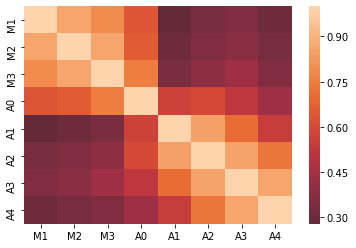

In [33]:
fig =sns.heatmap(Returns.corr(), center = 0)
fig.get_figure().savefig(ospath(os.getcwd() + '/figs/correlation_heatmap.png'))

## Autocorrelações

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf

k = 0

products = sorted(data.keys())
fig, ax = plt.subplots(2, 4, sharex='col', sharey='row', figsize = (18,8))
for i in range(2):
    for j in range(4):
        plot = plot_acf(Returns[products[k]], lags = 15, ax = ax[i, j])
        ax[i, j].set_title(products[k])
        ax[i,0].set(ylabel='Autocorrelacao')
        ax[1,j].set(xlabel='Lag')
        k = k + 1
        
fig.savefig(ospath(os.getcwd() + '/figs/acf.png'))

In [ ]:
from statsmodels.graphics.tsaplots import plot_pacf
k = 0

products = sorted(data.keys())
fig, ax = plt.subplots(2, 4, sharex='col', sharey='row', figsize = (18,8))
for i in range(2):
    for j in range(4):
        plot = plot_pacf(Returns[products[k]], lags = 15, ax = ax[i, j])
        ax[i, j].set_title(products[k])
        ax[i,0].set(ylabel='Autocorrelação Parcial')
        ax[1,j].set(xlabel='Lag')
        k = k + 1
        
fig.savefig(ospath(os.getcwd() + '/figs/pacf.png'))

# Escolha dos modelos ARMA

In [30]:
import statsmodels.tsa.api as smt


In [31]:
for k in data.keys():
    best_aic = np.inf 
    best_order = None
    best_mdl = None


    a = np.empty([3,4])

    for i in range(1,3):
        for j in range(1,4):
            warnings.filterwarnings('ignore')
            try:
                tmp_mdl = smt.ARMA(Returns[k], order=(i, j)).fit(
                    method='mle', trend='nc'
                )
                tmp_aic = tmp_mdl.aic
                a[i,j] = tmp_aic
                if tmp_aic < best_aic:
                    best_aic = tmp_aic
                    best_order = (i, j)
                    best_mdl = tmp_mdl
            except: continue

    print(k)
    print('Best aic: {:6.5f} | order: {}'.format(best_aic, best_order))


M1
Best aic: -326.86021 | order: (2, 1)
M2
Best aic: -447.05565 | order: (1, 1)
M3
Best aic: -652.94374 | order: (1, 1)
A0
Best aic: -901.48288 | order: (1, 1)
A1
Best aic: -1267.21233 | order: (1, 1)
A2
Best aic: -1868.41243 | order: (1, 1)
A3
Best aic: -2107.56753 | order: (1, 1)
A4
Best aic: -2218.66541 | order: (1, 1)


# Testes de Heterocedasticidade Resíduos

In [32]:
from statsmodels.stats.diagnostic import het_arch
from statsmodels.stats.diagnostic import het_white


In [52]:
def engle_test_resid(series, order = (1,1)):
    model = smt.ARMA(series, order=order).fit(method='mle', trend='nc')      
    p_val = het_arch(model.resid)[1]
    print(series.name + ' p-value Engle: ' + str(p_val))
    with open(os.getcwd() + '/model_results/ARMA_'+ series.name + '.tex', "w") as text_file:
        text_file.write(model.summary().as_latex())
    return p_val

In [53]:
engle_test_resid(Returns.A0)
engle_test_resid(Returns.A1)
engle_test_resid(Returns.A2)
engle_test_resid(Returns.A3)
engle_test_resid(Returns.A4)
engle_test_resid(Returns.M1, order=(2,1))
engle_test_resid(Returns.M2)
engle_test_resid(Returns.M3)

A0 p-value Engle: 0.8590186336602714
A1 p-value Engle: 0.9999999999960347
A2 p-value Engle: 0.9999962731994367
A3 p-value Engle: 0.9711971789557975
A4 p-value Engle: 3.130107836806424e-11
M1 p-value Engle: 0.0898631709567866
M2 p-value Engle: 0.1754485227249692
M3 p-value Engle: 0.004645894127006504


0.004645894127006504

# Testes de Heterocedasticidade Séries

In [38]:
products = sorted(data.keys())
for p in products:
    print(p + ':  p-value Engle: ' + str(het_arch(Returns[p])[1]))

A0:  p-value Engle: 0.9593314551382427
A1:  p-value Engle: 0.9999999999999949
A2:  p-value Engle: 0.9999994357407552
A3:  p-value Engle: 0.979626387207603
A4:  p-value Engle: 1.7680387841488738e-13
M1:  p-value Engle: 0.24090883566409246
M2:  p-value Engle: 0.09169639214147016
M3:  p-value Engle: 0.036673556375100724


### Heterocedásticas:
##### A4 (série e resíduos)
##### M1 (resíduos)
##### M2 (Série)
##### M3 (Série e resíduos)

## GARCH

In [69]:
from arch import arch_model
def GARCH_Model(series):
    model = arch_model(series, vol='GARCH')
    fitted = model.fit()
    with open(os.getcwd() + '/model_results/GARCH_'+ series.name + '.tex', "w") as text_file:
        text_file.write(fitted.summary().as_latex())
    return fitted

GARCH_Model(Returns.A4)
GARCH_Model(Returns.M1)
GARCH_Model(Returns.M2)
GARCH_Model(Returns.M3)

Iteration:      1,   Func. Count:      6,   Neg. LLF: -1176.9046450661222
Iteration:      2,   Func. Count:     20,   Neg. LLF: -1177.7345857780333
Positive directional derivative for linesearch    (Exit mode 8)
            Current function value: -1177.734588771362
            Iterations: 6
            Function evaluations: 20
            Gradient evaluations: 2
Iteration:      1,   Func. Count:      6,   Neg. LLF: -165.50661918082204
Iteration:      2,   Func. Count:     16,   Neg. LLF: -165.57273105623284
Iteration:      3,   Func. Count:     25,   Neg. LLF: -165.67591470378267
Iteration:      4,   Func. Count:     33,   Neg. LLF: -165.71679011068284
Iteration:      5,   Func. Count:     39,   Neg. LLF: -165.88880986700784
Iteration:      6,   Func. Count:     45,   Neg. LLF: -165.99753784876214
Iteration:      7,   Func. Count:     51,   Neg. LLF: -166.08095810364068
Iteration:      8,   Func. Count:     57,   Neg. LLF: -166.09780489939263
Iteration:      9,   Func. Count:     63, 

/Users/pedroargento/anaconda3/lib/python3.7/site-packages/arch/univariate/base.py:605: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  ConvergenceWarning)


                     Constant Mean - GARCH Model Results                      
Dep. Variable:                     M3   R-squared:                      -0.002
Mean Model:             Constant Mean   Adj. R-squared:                 -0.002
Vol Model:                      GARCH   Log-Likelihood:                329.402
Distribution:                  Normal   AIC:                          -650.805
Method:            Maximum Likelihood   BIC:                          -635.118
                                        No. Observations:                  373
Date:                Tue, Jan 21 2020   Df Residuals:                      369
Time:                        11:18:41   Df Model:                            4
                                  Mean Model                                  
                  coef    std err          t      P>|t|       95.0% Conf. Int.
------------------------------------------------------------------------------
mu         -5.8927e-04  5.313e-03     -0.111      0.

## EGARCH

In [70]:
def EGARCH_Model(series):
    model = arch_model(series, vol='EGARCH', o =1)
    fitted = model.fit()
    with open(os.getcwd() + '/model_results/EGARCH_'+ series.name + '.tex', "w") as text_file:
        text_file.write(fitted.summary().as_latex())
    return fitted
    
EGARCH_Model(Returns.A4)
EGARCH_Model(Returns.M1)
EGARCH_Model(Returns.M2)
EGARCH_Model(Returns.M3)



Iteration:      1,   Func. Count:      7,   Neg. LLF: -1175.1281657373756
Iteration:      2,   Func. Count:     22,   Neg. LLF: -1176.2343520577924
Iteration:      3,   Func. Count:     33,   Neg. LLF: -1177.1745303212022
Iteration:      4,   Func. Count:     45,   Neg. LLF: -1177.1796552363453
Iteration:      5,   Func. Count:     55,   Neg. LLF: -1177.3050673648572
Iteration:      6,   Func. Count:     65,   Neg. LLF: -1177.4730680458722
Iteration:      7,   Func. Count:     73,   Neg. LLF: -1177.5346642420966
Iteration:      8,   Func. Count:     80,   Neg. LLF: -1177.5480306285253
Iteration:      9,   Func. Count:     87,   Neg. LLF: -1177.5483836058474
Iteration:     10,   Func. Count:     94,   Neg. LLF: -1177.5484000818406
Optimization terminated successfully.    (Exit mode 0)
            Current function value: -1177.5484000832766
            Iterations: 10
            Function evaluations: 94
            Gradient evaluations: 10
Iteration:      1,   Func. Count:      7,   Neg.

                     Constant Mean - EGARCH Model Results                     
Dep. Variable:                     M3   R-squared:                      -0.001
Mean Model:             Constant Mean   Adj. R-squared:                 -0.001
Vol Model:                     EGARCH   Log-Likelihood:                331.952
Distribution:                  Normal   AIC:                          -653.904
Method:            Maximum Likelihood   BIC:                          -634.296
                                        No. Observations:                  373
Date:                Tue, Jan 21 2020   Df Residuals:                      368
Time:                        11:19:42   Df Model:                            5
                                  Mean Model                                 
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
mu         8.7852e-04  5.664e-04      1.551      0.121 

## GJR

In [71]:
def GJR(series):
    model = arch_model(series,  p=1, o=1, q=1, vol='GARCH')
    fitted = model.fit()
    with open(os.getcwd() + '/model_results/GJR_'+ series.name + '.tex', "w") as text_file:
        text_file.write(fitted.summary().as_latex())
    return fitted

GJR(Returns.A4)
GJR(Returns.M1)
GJR(Returns.M2)
GJR(Returns.M3)

Iteration:      1,   Func. Count:      7,   Neg. LLF: -1176.6759136104079
Iteration:      2,   Func. Count:     22,   Neg. LLF: -1177.5957266075575
Positive directional derivative for linesearch    (Exit mode 8)
            Current function value: -1177.595729041307
            Iterations: 6
            Function evaluations: 22
            Gradient evaluations: 2
Iteration:      1,   Func. Count:      7,   Neg. LLF: -167.63282358020786
Iteration:      2,   Func. Count:     18,   Neg. LLF: -167.64270039339823
Iteration:      3,   Func. Count:     29,   Neg. LLF: -167.64455404243392
Iteration:      4,   Func. Count:     37,   Neg. LLF: -167.91220651982763
Iteration:      5,   Func. Count:     45,   Neg. LLF: -167.9739667129124
Iteration:      6,   Func. Count:     53,   Neg. LLF: -168.41291489647276
Iteration:      7,   Func. Count:     60,   Neg. LLF: -168.44904493642306
Iteration:      8,   Func. Count:     67,   Neg. LLF: -168.51659342171172
Iteration:      9,   Func. Count:     74,  

/Users/pedroargento/anaconda3/lib/python3.7/site-packages/arch/univariate/base.py:605: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  ConvergenceWarning)


Iteration:      1,   Func. Count:      7,   Neg. LLF: -327.7597977481405
Iteration:      2,   Func. Count:     19,   Neg. LLF: -328.33797828805046
Iteration:      3,   Func. Count:     30,   Neg. LLF: -328.39750501317576
Iteration:      4,   Func. Count:     40,   Neg. LLF: -328.80642600087276
Iteration:      5,   Func. Count:     49,   Neg. LLF: -328.84319535910885
Iteration:      6,   Func. Count:     57,   Neg. LLF: -329.03342547971397
Iteration:      7,   Func. Count:     65,   Neg. LLF: -329.24848423227184
Iteration:      8,   Func. Count:     73,   Neg. LLF: -329.37166590254986
Iteration:      9,   Func. Count:     81,   Neg. LLF: -329.4508339737342
Iteration:     10,   Func. Count:     89,   Neg. LLF: -329.4521379264483
Iteration:     11,   Func. Count:     96,   Neg. LLF: -329.4523566841749
Iteration:     12,   Func. Count:    103,   Neg. LLF: -329.4524589570008
Iteration:     13,   Func. Count:    110,   Neg. LLF: -329.45246051654067
Optimization terminated successfully.    (E

                   Constant Mean - GJR-GARCH Model Results                    
Dep. Variable:                     M3   R-squared:                      -0.002
Mean Model:             Constant Mean   Adj. R-squared:                 -0.002
Vol Model:                  GJR-GARCH   Log-Likelihood:                329.452
Distribution:                  Normal   AIC:                          -648.905
Method:            Maximum Likelihood   BIC:                          -629.297
                                        No. Observations:                  373
Date:                Tue, Jan 21 2020   Df Residuals:                      368
Time:                        11:19:54   Df Model:                            5
                                  Mean Model                                  
                  coef    std err          t      P>|t|       95.0% Conf. Int.
------------------------------------------------------------------------------
mu         -5.6682e-04  5.223e-03     -0.109      0.

## Two State Variance Switching

In [65]:
def MSV (series):
    
    # Fit the model
    mod_kns = sm.tsa.MarkovRegression(series, k_regimes=2, trend='nc', switching_variance=True)
    res_kns = mod_kns.fit()
    with open(os.getcwd() + '/model_results/MSV_'+ series.name + '.tex', "w") as text_file:
        text_file.write(res_kns.summary().as_latex())


    fig, axes = plt.subplots(3, figsize=(10,7))
    
    ax=axes[0]
    ax.plot(series)
    ax.set_ylabel('Retorno')
    ax.set_title(series.name + ' retornos')
    
    ax = axes[1]
    ax.plot(res_kns.smoothed_marginal_probabilities[0])
    ax.set(title='Probabilidade de um regime de baixa variância para retornos futuros')
    ax.set_ylabel('Probabilidade')

    ax = axes[2]
    ax.plot(res_kns.smoothed_marginal_probabilities[1])
    ax.set(title='Probabilidade de um regime de alta variância para retornos futuros')
    ax.set_ylabel('Probabilidade')
    fig.tight_layout()

    fig.savefig(ospath(os.getcwd() + '/figs/'+ series.name +'MSV.png'))
    return res_kns

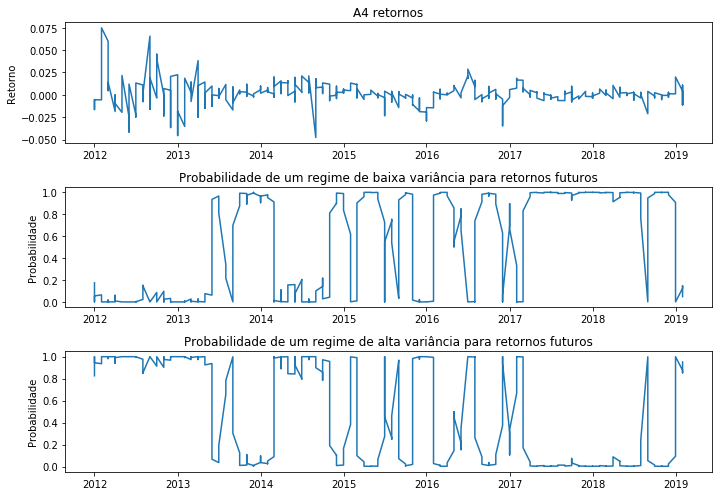

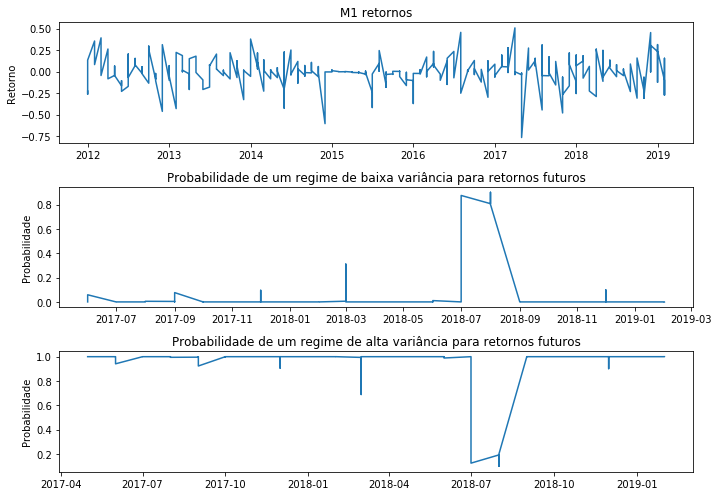

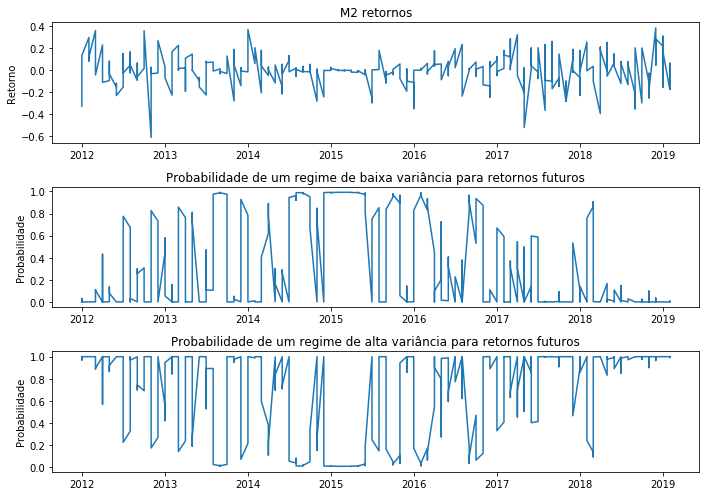

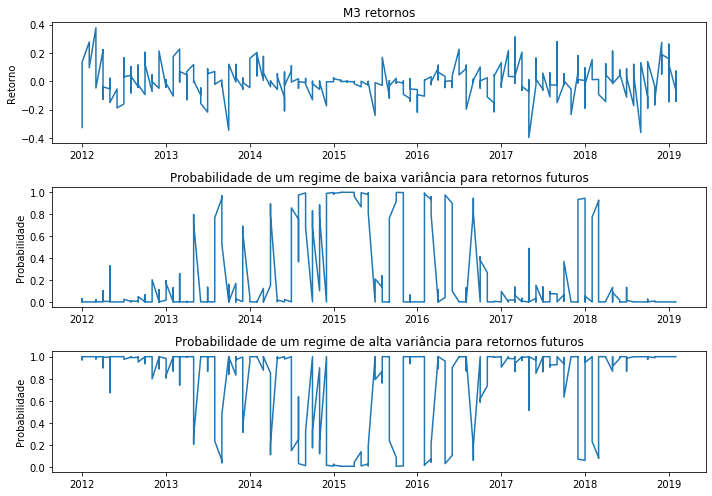

In [72]:
A4_msv = MSV(Returns.A4)
M1_msv = MSV(Returns.M1)
M2_msv = MSV(Returns.M2)
M3_msv = MSV(Returns.M3)